## Exploration Part

In [6]:
import pickle
import random
from collections import defaultdict
from typing import Tuple, Dict, Any, List
import numpy as np
import os
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
from tqdm import tqdm
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import warnings

In [7]:
data_path = "../data/fma_metadata"
dimentions_options = [10, 50, 100, 200]
num_clusters_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
num_of_cvs = 7
cv_size = 5000
p_value_thr = 0.05
external_vars = ["('track', 'genre_top')", "('track', 'license')", "('album', 'type')"]

In [8]:
def load_data() -> Tuple[np.ndarray, pd.DataFrame]:
    cache_file = f"{data_path}/clean_static_data.csv"
    if Path(cache_file).is_file():
        df = pd.read_csv(cache_file)
    else:
        features = pd.read_csv(os.path.join(data_path, "features.csv"), index_col=0, header=[0, 1, 2])
        tracks = pd.read_csv(os.path.join(data_path, "tracks.csv"), index_col=0, header=[0, 1])
        features.columns = features.columns.map('_'.join)
        df = pd.concat([features, tracks[external_vars]], axis=1)
        df = df.dropna()
        df.to_csv(cache_file)
    X, y = df.drop(external_vars, axis=1), df[external_vars]
    for column in external_vars:
        y[column] = y[column].astype('category').cat.codes
    X = MinMaxScaler(feature_range=(-1, 1)).fit_transform(X)
    return X, y

## Implementation Part

In [9]:
X, y = load_data()

/var/folders/b6/q8hy7lgd7v7glnmnnb18fg1w0000gn/T/ipykernel_9693/2174546276.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = y[column].astype('category').cat.codes
/var/folders/b6/q8hy7lgd7v7glnmnnb18fg1w0000gn/T/ipykernel_9693/2174546276.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = y[column].astype('category').cat.codes
/var/folders/b6/q8hy7lgd7v7glnmnnb18fg1w0000gn/T/ipykernel_9693/2174546276.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [11]:
df = pd.read_csv(f"{data_path}/clean_static_data.csv")

In [12]:
df

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01,"('track', 'genre_top')","('track', 'license')","('album', 'type')"
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,Hip-Hop,Attribution-NonCommercial-ShareAlike 3.0 Inter...,Album
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330,Hip-Hop,Attribution-NonCommercial-ShareAlike 3.0 Inter...,Album
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861,Hip-Hop,Attribution-NonCommercial-ShareAlike 3.0 Inter...,Album
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800,Pop,Attribution-NonCommercial-NoDerivatives (aka M...,Album
4,134,0.918445,0.674147,0.577818,1.281117,0.933746,0.078177,1.199204,-0.175223,0.925482,...,4.731087,0.419434,0.064370,0.050781,0.000000,1.806106,0.054623,Hip-Hop,Attribution-NonCommercial-ShareAlike 3.0 Inter...,Album
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47487,155315,-0.319850,0.653044,1.300360,-0.606061,-1.109302,-1.006683,0.059643,0.472580,-0.856436,...,6.947788,0.188477,0.037708,0.035156,0.002930,1.764233,0.018679,Rock,Creative Commons Attribution-NonCommercial-NoD...,Live Performance
47488,155316,-0.490129,0.463834,2.321970,-0.084352,1.662914,2.115189,-0.237794,5.695442,0.830353,...,4.448255,0.172852,0.028773,0.028320,0.003906,0.955388,0.012385,Rock,Creative Commons Attribution-NonCommercial-NoD...,Live Performance
47489,155317,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.082687,-0.229483,...,3.270612,0.196289,0.031116,0.027832,0.002441,1.283060,0.019059,Rock,Creative Commons Attribution-NonCommercial-NoD...,Live Performance
47490,155318,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.713526,1.418444,1.325197,...,2.356727,0.212891,0.038450,0.037109,0.003418,0.828569,0.017904,Rock,Creative Commons Attribution-NonCommercial-NoD...,Live Performance


### Cluster the remaining columns, and explain what are is the best clustering method.
- silhouette_score
- elbow method
- k-fold cross validation on silhouette_score or Matual information with - kruskal wallis or anova

In [13]:
import numpy as np
from sklearn.decomposition import PCA, FastICA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch, BisectingKMeans
from sklearn.manifold import TSNE, SpectralEmbedding, Isomap, MDS
from fcmeans import FCM
from sklearn.cluster import SpectralClustering
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.manifold import LocallyLinearEmbedding
from umap import UMAP


def k_mean(k, data: np.ndarray):
    model = KMeans(k, max_iter=1000)
    labels = model.fit_predict(data)
    return labels


def fuzzy_c_means(k, data: np.ndarray):
    model = FCM(n_clusters=k, n_jobs=-1)
    model.fit(data)
    return model.predict(data)


def gaussian_mixture(k: int, data: np.ndarray):
    model = GaussianMixture(k, max_iter=3000)
    labels = model.fit_predict(data)
    return labels


def hierarchical_clustering(k: int, data: np.ndarray):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    labels = model.fit_predict(data)
    return labels


def birch(k: int, data: np.ndarray):
    model = Birch(n_clusters=k)
    labels = model.fit_predict(data)
    return labels


def spectral_clustering(k: int, data: np.ndarray):
    model = SpectralClustering(n_clusters=k, assign_labels='discretize', n_jobs=-1)
    labels = model.fit_predict(data)
    return labels


def dbscan(k: int, data: np.ndarray):
    model = DBSCAN(eps=((k / 100) ** 2) * data.shape[1], min_samples=5, n_jobs=-1)
    labels = model.fit_predict(data)
    return labels


def bisecting_kmeans(k: int, data: np.ndarray):
    model = BisectingKMeans(n_clusters=k)
    labels = model.fit_predict(data)
    return labels


clustering_algorithms = {
    "k_mean": k_mean,
    "fuzzy_c_means": fuzzy_c_means,
    "gaussian_mixture": gaussian_mixture,
    "hierarchical_clustering": hierarchical_clustering,
    "birch": birch,
    "spectral_clustering": spectral_clustering,
    "dbscan": dbscan,
    "bisecting_kmeans": bisecting_kmeans
}

dim_reduction_algorithms = {
    "MDS": lambda k: MDS(n_components=k, n_jobs=-1, max_iter=300),
    "PCA": lambda k: PCA(n_components=k),
    "FastICA": lambda k: FastICA(n_components=k, max_iter=200),
    "without_reduction": None,
    "Isomap": lambda k: Isomap(n_components=k, n_jobs=-1, max_iter=200),
    "SpectralEmbedding": lambda k: SpectralEmbedding(n_components=k, n_jobs=-1),
    "LLE": lambda k: LocallyLinearEmbedding(n_components=k, n_jobs=-1),
    "UMAP": lambda k: UMAP(n_neighbors=100, n_components=k, n_epochs=1000, init='spectral', low_memory=False, verbose=False)
    # "TSNE": lambda k: TSNE(n_components=k, method="exact", init="random", n_jobs=-1, n_iter=250),
}

anomaly_detection_algorithms = {
    "without_anomaly": None,
    "OneClassSVM": OneClassSVM(kernel="rbf", nu=0.01, gamma='scale'),
    "IsolationForest": IsolationForest(random_state=0, n_jobs=-1, n_estimators=500, max_samples=256),
    "DBSCAN": DBSCAN(eps=5, min_samples=5, n_jobs=-1)
}


In [14]:
import pickle
import random
from collections import defaultdict
from typing import Tuple, Dict, Any, List
import numpy as np
import os
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
from tqdm import tqdm
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

OUTPUT_PATH = "../output/"
Path(OUTPUT_PATH).mkdir(parents=True, exist_ok=True)
CACHE_PATH = "../cache/"
Path(CACHE_PATH).mkdir(parents=True, exist_ok=True)

# Config
# random_state = 0
data_path = "../data/fma_metadata"
dimentions_options = [10, 50, 100, 200]
num_clusters_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
num_of_cvs = 5
cv_size = 5000
p_value_thr = 0.05
external_vars = ["('track', 'genre_top')", "('track', 'license')", "('album', 'type')"]


def start_new_experiment(exp_name: str):
    global OUTPUT_PATH
    global CACHE_PATH
    suffix = f"{exp_name}-{datetime.today().strftime('%m-%d %H:%M:%S')}"
    OUTPUT_PATH = f"../output/{suffix}/"
    Path(OUTPUT_PATH).mkdir(parents=True, exist_ok=True)
    CACHE_PATH = f"../cache/{exp_name}/"
    # Path(CACHE_PATH).mkdir(parents=True, exist_ok=True)


def load_data() -> Tuple[np.ndarray, pd.DataFrame]:
    cache_file = f"{data_path}/clean_static_data.csv"
    if Path(cache_file).is_file():
        df = pd.read_csv(cache_file)
    else:
        features = pd.read_csv(os.path.join(data_path, "features.csv"), index_col=0, header=[0, 1, 2])
        tracks = pd.read_csv(os.path.join(data_path, "tracks.csv"), index_col=0, header=[0, 1])
        features.columns = features.columns.map('_'.join)
        df = pd.concat([features, tracks[external_vars]], axis=1)
        df = df.dropna()
        df.to_csv(cache_file)
    X, y = df.drop(external_vars, axis=1), df[external_vars]
    for column in external_vars:
        y[column] = y[column].astype('category').cat.codes
    X = MinMaxScaler(feature_range=(-1, 1)).fit_transform(X)
    return X, y


def generate_cvs(X: np.ndarray, y: pd.DataFrame) -> Tuple[List[np.ndarray], List[pd.DataFrame]]:
    X_cvs = []
    y_cvs = []
    for i in range(num_of_cvs):
        rows = np.random.randint(X.shape[0], size=cv_size)
        X_cvs.append(X[rows, :])
        y_cvs.append(y.iloc[rows])
    return X_cvs, y_cvs


def reduction_algo_wrapper(reduction_algo_name: str, dim_num: int, cv_data: np.ndarray, cv_id: int) -> np.ndarray:
    reduction_algo = dim_reduction_algorithms[reduction_algo_name]
    if reduction_algo is None:
        return cv_data
    cache_file = os.path.join(CACHE_PATH, f"{reduction_algo_name}-{dim_num}-{cv_id}.pkl")
    if Path(cache_file).is_file():
        with open(cache_file, "rb") as file:
            return pickle.load(file)
    cv_data = reduction_algo(dim_num).fit_transform(cv_data)
    with open(cache_file, "wb") as file:
        pickle.dump(cv_data, file)
    return cv_data


def find_best_algo(scores_mapping: Dict[str, List[float]], random_when_same: bool = True) -> str:
    _, p_value = f_oneway(*list(scores_mapping.values()))
    best_algo = random.choice(list(scores_mapping.values()))
    if p_value < p_value_thr:
        sorted_scores = sorted(
            scores_mapping,
            key=lambda key: np.mean(scores_mapping[key]),
            reverse=True
        )
        candidate1, candidate2 = sorted_scores[:2]
        _, t_test_p_value = ttest_rel(
            scores_mapping[candidate1],
            scores_mapping[candidate2]
        )
        best_algo_name: str = sorted_scores[0]
        best_algo = scores_mapping[best_algo_name]
        if t_test_p_value >= p_value_thr:
            print(f"followed by t-test: algorithms {candidate1}, {candidate2} are the same")
            if not random_when_same:
                return f"{candidate1, candidate2}"
    else:
        print(f"followed by annova: algorithms {scores_mapping.keys()} are the same")
        if not random_when_same:
            return ""
    return best_algo


def get_silhouette_scores(
        X_cvs: List[np.ndarray],
        clustering_algo_name: str, reduction_algo_name: str,
        dim_num: int, k_clusters: int
) -> List[float]:
    scores = []
    for cv_id, cv_data in tqdm(enumerate(X_cvs)):
        try:
            cv_data = reduction_algo_wrapper(reduction_algo_name, dim_num, cv_data, cv_id)
            print(f"doing {clustering_algo_name} for {cv_data.shape} by {reduction_algo_name}")
            labels = clustering_algorithms[clustering_algo_name](k_clusters, cv_data)
            print(f"anomaly: {labels[labels == -1].size / labels.size}")
            scores.append(silhouette_score(cv_data[labels != -1], labels[labels != -1]))
        except Exception as e:
            print(e)
            scores.append(-1)
    return scores


def find_best_config_by_clustering(X_cvs: List[np.ndarray]) -> Dict[str, Dict[str, Any]]:
    best_config_by_clustering = dict()
    for clustering_algo_name in clustering_algorithms.keys():
        dim_reduction_scores = dict()
        dim_reduction_meta: Dict[str, Dict[str, Any]] = dict()
        for reduction_algo_name in tqdm(dim_reduction_algorithms.keys()):
            max_score = float("-inf")
            for dim_num in tqdm(dimentions_options):
                for k_clusters in tqdm(num_clusters_options):
                    scores = get_silhouette_scores(
                        X_cvs, clustering_algo_name,
                        reduction_algo_name, dim_num, k_clusters
                    )
                    curr_score = np.mean(scores)
                    if curr_score > max_score:
                        max_score = curr_score
                        dim_reduction_scores[reduction_algo_name] = scores
                        dim_reduction_meta[reduction_algo_name] = {
                            "max_score": max_score,
                            "max_dim_num": dim_num,
                            "max_cluster_num": k_clusters,
                            "scores": scores,
                            "reduction_algo_name": reduction_algo_name
                        }
        best_algo_name = find_best_algo(dim_reduction_scores)
        best_config_by_clustering[clustering_algo_name] = dim_reduction_meta[best_algo_name]
        print(f"picking for {clustering_algo_name}: {best_config_by_clustering[clustering_algo_name]}")
    return best_config_by_clustering


def find_best_cluster_algo_per_external_var(X_cvs: List[np.ndarray], y_cvs: List[pd.DataFrame],
                                            best_config_by_clustering: Dict[str, Dict[str, Any]]):
    # hidden variables with the best clustering and dim_reduction
    best_cluster_algo_per_external_var = dict()
    for external_var_name in external_vars:
        all_mi = dict()
        for clustering_algo_name, clustering_algo in tqdm(clustering_algorithms.items()):
            scores = []
            best_config = best_config_by_clustering[clustering_algo_name]
            for cv_id, (cv_data, cv_y_true) in tqdm(enumerate(zip(X_cvs, y_cvs))):
                try:
                    cv_data = reduction_algo_wrapper(
                        best_config["reduction_algo_name"],
                        best_config["max_dim_num"],
                        cv_data, cv_id
                    )
                    labels = clustering_algo(best_config["max_cluster_num"], cv_data)
                    scores.append(mutual_info_score(labels, cv_y_true[external_var_name].values))
                except Exception as e:
                    print(e)
                    scores.append(-1)
            all_mi[clustering_algo_name] = scores
        best_algo_name = find_best_algo(all_mi)
        best_cluster_algo_per_external_var[external_var_name] = {
            "algo_name": best_algo_name,
            "scores": all_mi[best_algo_name]
        }
    print(best_cluster_algo_per_external_var)
    with open(f"{OUTPUT_PATH}/best_cluster_algo_per_external_var.pkl", "wb") as file:
        pickle.dump(best_cluster_algo_per_external_var, file)
    return best_cluster_algo_per_external_var


def find_best_external_var_per_clustering(X_cvs: List[np.ndarray], y_cvs: List[pd.DataFrame],
                                          best_config_by_clustering: Dict[str, Dict[str, Any]]):
    best_external_var_per_clustering = dict()
    for clustering_algo_name, clustering_algo in clustering_algorithms.items():
        all_mi = dict()
        for external_var_name in tqdm(external_vars):
            scores = []
            best_config = best_config_by_clustering[clustering_algo_name]
            for cv_id, (cv_data, cv_y_true) in tqdm(enumerate(zip(X_cvs, y_cvs))):
                try:
                    cv_data = reduction_algo_wrapper(
                        best_config["reduction_algo_name"],
                        best_config["max_dim_num"],
                        cv_data, cv_id
                    )
                    labels = clustering_algo(cv_y_true[external_var_name].nunique(), cv_data)
                    scores.append(mutual_info_score(labels, cv_y_true[external_var_name].values))
                except Exception as e:
                    print(e)
                    scores.append(-1)
            all_mi[external_var_name] = scores
        best_external_var_per_clustering[clustering_algo_name] = find_best_algo(all_mi, random_when_same=False)
    print(best_external_var_per_clustering)
    with open(f"{OUTPUT_PATH}/best_external_var_per_clustering.pkl", "wb") as file:
        pickle.dump(best_external_var_per_clustering, file)
    return best_external_var_per_clustering


def full_flow():
    X, y = load_data()
    X_cvs, y_cvs = generate_cvs(X, y)
    for anomaly_algo_name, anomaly_algo in tqdm(anomaly_detection_algorithms.items()):
        print(f"\n\n--------------{anomaly_algo_name}-------------\n")
        start_new_experiment(anomaly_algo_name)
        if anomaly_algo:
            labels = anomaly_algo.fit_predict(X)
            X_cvs, y_cvs = generate_cvs(X[labels != -1], y[labels != -1])
        best_config_by_clustering = find_best_config_by_clustering(X_cvs)
        best_cluster_algo_per_external_var = find_best_cluster_algo_per_external_var(X_cvs, y_cvs,
                                                                                     best_config_by_clustering)
        best_external_var_per_clustering = find_best_external_var_per_clustering(X_cvs, y_cvs,
                                                                                 best_config_by_clustering)
        print("--------best_config_by_clustering------------")
        print(best_config_by_clustering)
        print("\n--------best_cluster_algo_per_external_var------------")
        print(best_cluster_algo_per_external_var)
        print("\n--------best_external_var_per_clustering------------")
        print(best_external_var_per_clustering)


def external_var_to_anomalies():
    X, y = load_data()
    for anomaly_algo_name, anomaly_algo in tqdm(anomaly_detection_algorithms.items(), position=0, desc="anomaly", leave=False, colour='green', ncols=80):
        if anomaly_algo is None:
            continue
        scores = defaultdict(list)
        labels = anomaly_algo.fit_predict(X)
        for external_var_name in tqdm(external_vars, position=1, desc="external_var", leave=False, colour='blue', ncols=80):
            print(y[external_var_name].values[labels == -1])
            scores[external_var_name].append(
                mutual_info_score(
                    labels[labels == -1],
                    y[external_var_name].values[labels == -1]
                )
            )

        for external_var_name, external_var_scores in scores.items():
            print(f"{external_var_name}: {np.mean(external_var_scores)}")



In [15]:
X, y = load_data()
rows = np.random.randint(X.shape[0], size=cv_size)
X = X[rows, :]

In [26]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(X, X).mean()

5.162579960528059

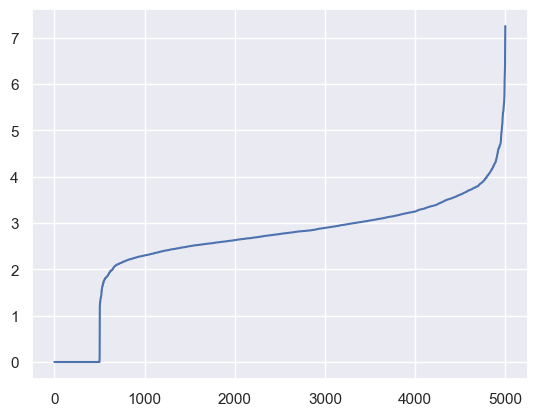

In [30]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [21]:
X.shape[1]

519

In [33]:
for column in y.columns:
    print(column, y[column].nunique())

('track', 'genre_top') 16
('track', 'license') 88
('album', 'type') 4


In [ ]:
full_flow()

#### Dbscan

In [ ]:

def get_best_dbscan_params(clean_X: np.ndarray, min_samples: int):
    range_eps = np.linspace(0.1, 10, 20)
    scores = []
    for eps in range_eps:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        good_labels = model.fit_predict(clean_X)
        noisy_data_count = len(good_labels[good_labels == -1])
        if noisy_data_count > good_labels.shape[0] * 0.5 or len(np.unique(good_labels)) < 3:
            scores.append(0)
            continue
        print(f"noisy data count with eps={eps}: {noisy_data_count}")
        try:
            score = metrics.silhouette_score(clean_X, good_labels)
        except:
            score = 0
        scores.append(score)
    plt.plot(range_eps, scores)
    plt.show()
    return range_eps[np.argmax(scores)]


### Find anomalies in the data

In [17]:
import numpy as np
from keras import Model, Input
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch
from sklearn.manifold import TSNE, SpectralEmbedding, Isomap, MDS
from fcmeans import FCM
from sklearn.cluster import SpectralClustering
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import hdbscan
import scipy.cluster.hierarchy as sch

### using DBSCAN

[]

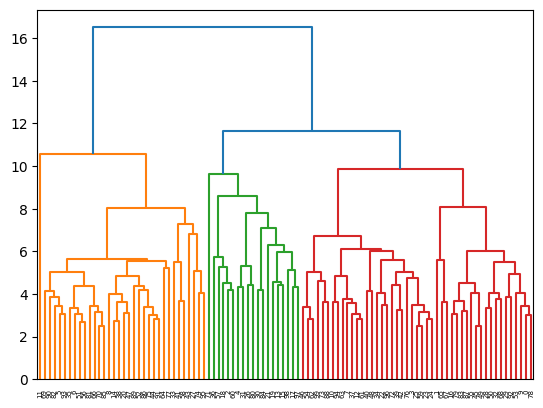

In [49]:
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(X[np.random.randint(X.shape[0], size=100), :], method='ward'))
plt.plot()

In [36]:
model = DBSCAN(eps=0.1**2*X.shape[1], min_samples=5, n_jobs=-1)
labels = model.fit_predict(X[np.random.randint(X.shape[0], size=1000), :])

In [37]:
labels[labels == -1].size / labels.size

0.013

In [68]:
labels = IsolationForest(random_state=0, n_jobs=-1, n_estimators=500, max_samples=256).fit_predict(X)

In [74]:
labels[labels == -1].size / labels.size

0.020066537522108987

In [25]:
labels = OneClassSVM(kernel="rbf", max_iter=1000, nu=.05, gamma='scale').fit_predict(X[np.random.randint(X.shape[0], size=1000), :])
labels[labels == -1].size / labels.size

0.051

### test whether anomalies are associated with any of the external variables

In [ ]:
    X, y = load_data()
    for anomaly_algo_name, anomaly_algo in tqdm(anomaly_detection_algorithms.items(), position=0, desc="anomaly", leave=False, colour='green', ncols=80):
        if anomaly_algo is None:
            continue
        scores = defaultdict(list)
        labels = anomaly_algo.fit_predict(X)
        for external_var_name in tqdm(external_vars, position=1, desc="external_var", leave=False, colour='blue', ncols=80):
            scores[external_var_name].append(
                mutual_info_score(
                    labels[labels == -1],
                    y[external_var_name].values[labels == -1]
                )
            )

        for external_var_name, external_var_scores in scores.items():
            print(f"{external_var_name}: {np.mean(external_var_scores)}")

### check if anomaly detection improves the clustering